In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_parquet('../data/upload_spans.parquet')

In [3]:
df.head(10)

,spanID,traceID,operationName,serviceName,startTime,duration,tag_http.method,tag_http.scheme,tag_net.host.name,tag_net.sock.peer.addr,...,tag_http.url,tag_file.type,tag_otel.status_code,tag_uuid,tag_minio.bucket,tag_file.name,tag_minio.file.size,tag_response.status,tag_error,tag_otel.status_description
0,a2e4df5ffaaa14fe,71ce43e1dde3df564f3af7b04b2a5e24,/upload,None,2024-03-23 20:59:50.764822,43379805,POST,http,sr-api,172.21.0.1,...,None,None,None,None,None,None,NaN,None,None,None
1,83792e72d981a9b0,71ce43e1dde3df564f3af7b04b2a5e24,UploadHandler,None,2024-03-23 20:59:50.764844,43379765,POST,None,None,None,...,/upload,None,None,None,None,None,NaN,None,None,None
2,2bd0b1fb9736f9a5,71ce43e1dde3df564f3af7b04b2a5e24,CheckFileSignatureWithGinContext,None,2024-03-23 20:59:50.765262,399,POST,None,None,None,...,/upload,audio/ogg,OK,None,None,None,NaN,None,None,None
3,50cbbd6e2cae701e,71ce43e1dde3df564f3af7b04b2a5e24,GenerateUID,None,2024-03-23 20:59:50.765724,10,POST,None,None,None,...,/upload,None,OK,4a477e53-e958-11ee-9cae-0242ac150007,None,None,NaN,None,None,None
4,7bb923560eabd087,71ce43e1dde3df564f3af7b04b2a5e24,UploadToMinioWithContext,None,2024-03-23 20:59:50.765755,10929,POST,None,None,None,...,/upload,None,OK,None,audio,4a477e53-e958-11ee-9cae-0242ac150007.opus,16622.0,None,None,None
5,1056e7fb484aab18,71ce43e1dde3df564f3af7b04b2a5e24,ProcessFileWithGinContext,None,2024-03-23 20:59:50.776742,43367783,POST,None,None,None,...,/upload,None,OK,None,None,None,NaN,success,None,None
6,5d3c6692539968ac,71ce43e1dde3df564f3af7b04b2a5e24,GetEnvOrShutdownWithTelemetry WHISPER_ENDPOINT,None,2024-03-23 20:59:50.776768,4,POST,None,None,None,...,/upload,None,OK,None,None,None,NaN,None,None,None
7,5194f9c1c3375285,71ce43e1dde3df564f3af7b04b2a5e24,GetEnvOrShutdownWithTelemetry WHISPER_TRANSCRIBE,None,2024-03-23 20:59:50.776782,2,POST,None,None,None,...,/upload,None,OK,None,None,None,NaN,None,None,None
8,8ef9a7ec0b2cc69b,00515190b8c7791e55ad9143b7522ec6,/upload,None,2024-03-23 20:59:19.733744,30374452,POST,http,sr-api,172.21.0.1,...,None,None,None,None,None,None,NaN,None,None,None
9,2a4ec10316a1fabd,00515190b8c7791e55ad9143b7522ec6,UploadHandler,None,2024-03-23 20:59:19.733769,30374401,POST,None,None,None,...,/upload,None,None,None,None,None,NaN,None,None,None


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31187 entries, 0 to 31186
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   spanID                       31187 non-null  object        
 1   traceID                      31187 non-null  object        
 2   operationName                31187 non-null  object        
 3   serviceName                  0 non-null      object        
 4   startTime                    31187 non-null  datetime64[ns]
 5   duration                     31187 non-null  int64         
 6   tag_http.method              31187 non-null  object        
 7   tag_http.scheme              3899 non-null   object        
 8   tag_net.host.name            3899 non-null   object        
 9   tag_net.sock.peer.addr       3899 non-null   object        
 10  tag_net.sock.peer.port       3899 non-null   float64       
 11  tag_user_agent.original      3899 non-nul

In [5]:
df.describe()

,startTime,duration,tag_net.sock.peer.port,tag_http.status_code,tag_minio.file.size
count,31187,3.118700e+04,3899.000000,3899.000000,3898.000000
mean,2024-03-23 08:34:04.163233792,8.326618e+06,46776.104642,200.076943,16266.313751
min,2024-03-22 20:11:52.207159,1.000000e+00,32772.000000,200.000000,1253.000000
25%,2024-03-23 02:16:49.613746944,9.000000e+00,39902.000000,200.000000,11491.000000
50%,2024-03-23 08:37:30.468296960,5.432000e+03,46848.000000,200.000000,14461.000000
75%,2024-03-23 14:44:22.209793024,2.012400e+07,53612.000000,200.000000,19138.250000
max,2024-03-23 20:59:50.776782,9.999939e+07,60994.000000,500.000000,106797.000000
std,NaN,1.105731e+07,8078.876343,4.804461,7094.423281


In [6]:
df["startTime"].min()

Timestamp('2024-03-22 20:11:52.207159')

In [7]:
spans_df = df.copy()

In [8]:
# Aggregating data as per the requirements
# Step 1: Update operationName to `/upload`
df['operationName'] = '/upload'

# Step 2 and 3: Aggregate startTime and duration by traceID
# Convert startTime to datetime for accurate min calculation
df['startTime'] = pd.to_datetime(df['startTime'])
# Aggregate based on traceID, taking min of startTime, max of duration, and first non-null value of tag_minio.file.size
aggregated_df = df.groupby('traceID').agg({
    'startTime': 'min',
    'duration': 'max',
    'tag_minio.file.size': 'first'  # Assuming 'first' non-null captures the requirement
}).reset_index()

# Merging the aggregated information back with the original df to update the values accordingly
# We use left join to ensure all original rows are kept, updating them with the aggregated values
merged_df = pd.merge(df.drop(columns=['startTime', 'duration', 'tag_minio.file.size']),
                     aggregated_df, on='traceID', how='left')

# Display the first few rows of the updated dataframe
merged_df.head()


,spanID,traceID,operationName,serviceName,tag_http.method,tag_http.scheme,tag_net.host.name,tag_net.sock.peer.addr,tag_net.sock.peer.port,tag_user_agent.original,...,tag_otel.status_code,tag_uuid,tag_minio.bucket,tag_file.name,tag_response.status,tag_error,tag_otel.status_description,startTime,duration,tag_minio.file.size
0,a2e4df5ffaaa14fe,71ce43e1dde3df564f3af7b04b2a5e24,/upload,None,POST,http,sr-api,172.21.0.1,39966.0,Python/3.12 aiohttp/3.9.3,...,None,None,None,None,None,None,None,2024-03-23 20:59:50.764822,43379805,16622.0
1,83792e72d981a9b0,71ce43e1dde3df564f3af7b04b2a5e24,/upload,None,POST,None,None,None,NaN,None,...,None,None,None,None,None,None,None,2024-03-23 20:59:50.764822,43379805,16622.0
2,2bd0b1fb9736f9a5,71ce43e1dde3df564f3af7b04b2a5e24,/upload,None,POST,None,None,None,NaN,None,...,OK,None,None,None,None,None,None,2024-03-23 20:59:50.764822,43379805,16622.0
3,50cbbd6e2cae701e,71ce43e1dde3df564f3af7b04b2a5e24,/upload,None,POST,None,None,None,NaN,None,...,OK,4a477e53-e958-11ee-9cae-0242ac150007,None,None,None,None,None,2024-03-23 20:59:50.764822,43379805,16622.0
4,7bb923560eabd087,71ce43e1dde3df564f3af7b04b2a5e24,/upload,None,POST,None,None,None,NaN,None,...,OK,None,audio,4a477e53-e958-11ee-9cae-0242ac150007.opus,None,None,None,2024-03-23 20:59:50.764822,43379805,16622.0


In [9]:
# Dropping duplicated traceID where tag_minio.file.size is NaN, keeping the first occurrence
deduplicated_df_non_null_file_size = merged_df.dropna(subset=['tag_minio.file.size']).drop_duplicates(subset='traceID')

# Display the first few rows of the deduplicated dataframe with non-null file size
deduplicated_df_non_null_file_size.head()


,spanID,traceID,operationName,serviceName,tag_http.method,tag_http.scheme,tag_net.host.name,tag_net.sock.peer.addr,tag_net.sock.peer.port,tag_user_agent.original,...,tag_otel.status_code,tag_uuid,tag_minio.bucket,tag_file.name,tag_response.status,tag_error,tag_otel.status_description,startTime,duration,tag_minio.file.size
0,a2e4df5ffaaa14fe,71ce43e1dde3df564f3af7b04b2a5e24,/upload,None,POST,http,sr-api,172.21.0.1,39966.0,Python/3.12 aiohttp/3.9.3,...,None,None,None,None,None,None,None,2024-03-23 20:59:50.764822,43379805,16622.0
8,8ef9a7ec0b2cc69b,00515190b8c7791e55ad9143b7522ec6,/upload,None,POST,http,sr-api,172.21.0.1,48300.0,Python/3.12 aiohttp/3.9.3,...,None,None,None,None,None,None,None,2024-03-23 20:59:19.733744,30374452,9297.0
16,46dded639aa3f812,14509d2eea234da6154ee63bc2621828,/upload,None,POST,http,sr-api,172.21.0.1,60600.0,Python/3.12 aiohttp/3.9.3,...,None,None,None,None,None,None,None,2024-03-23 20:59:01.304120,18254505,10446.0
24,06b7f1a64bfe9f10,8c7c538fe5b9d21d284552871c4db521,/upload,None,POST,http,sr-api,172.21.0.1,51192.0,Python/3.12 aiohttp/3.9.3,...,None,None,None,None,None,None,None,2024-03-23 20:58:38.682478,22397795,14500.0
32,f904648bbba462c5,53f1442de6396ce3558fc1ab75494f62,/upload,None,POST,http,sr-api,172.21.0.1,54974.0,Python/3.12 aiohttp/3.9.3,...,None,None,None,None,None,None,None,2024-03-23 20:58:15.831379,22453263,11229.0


In [10]:
# Converting duration from microseconds to seconds
deduplicated_df_non_null_file_size['duration'] = deduplicated_df_non_null_file_size['duration'] / 1e6

# Display the first few rows to verify the conversion
deduplicated_df_non_null_file_size.head()


,spanID,traceID,operationName,serviceName,tag_http.method,tag_http.scheme,tag_net.host.name,tag_net.sock.peer.addr,tag_net.sock.peer.port,tag_user_agent.original,...,tag_otel.status_code,tag_uuid,tag_minio.bucket,tag_file.name,tag_response.status,tag_error,tag_otel.status_description,startTime,duration,tag_minio.file.size
0,a2e4df5ffaaa14fe,71ce43e1dde3df564f3af7b04b2a5e24,/upload,None,POST,http,sr-api,172.21.0.1,39966.0,Python/3.12 aiohttp/3.9.3,...,None,None,None,None,None,None,None,2024-03-23 20:59:50.764822,43.379805,16622.0
8,8ef9a7ec0b2cc69b,00515190b8c7791e55ad9143b7522ec6,/upload,None,POST,http,sr-api,172.21.0.1,48300.0,Python/3.12 aiohttp/3.9.3,...,None,None,None,None,None,None,None,2024-03-23 20:59:19.733744,30.374452,9297.0
16,46dded639aa3f812,14509d2eea234da6154ee63bc2621828,/upload,None,POST,http,sr-api,172.21.0.1,60600.0,Python/3.12 aiohttp/3.9.3,...,None,None,None,None,None,None,None,2024-03-23 20:59:01.304120,18.254505,10446.0
24,06b7f1a64bfe9f10,8c7c538fe5b9d21d284552871c4db521,/upload,None,POST,http,sr-api,172.21.0.1,51192.0,Python/3.12 aiohttp/3.9.3,...,None,None,None,None,None,None,None,2024-03-23 20:58:38.682478,22.397795,14500.0
32,f904648bbba462c5,53f1442de6396ce3558fc1ab75494f62,/upload,None,POST,http,sr-api,172.21.0.1,54974.0,Python/3.12 aiohttp/3.9.3,...,None,None,None,None,None,None,None,2024-03-23 20:58:15.831379,22.453263,11229.0


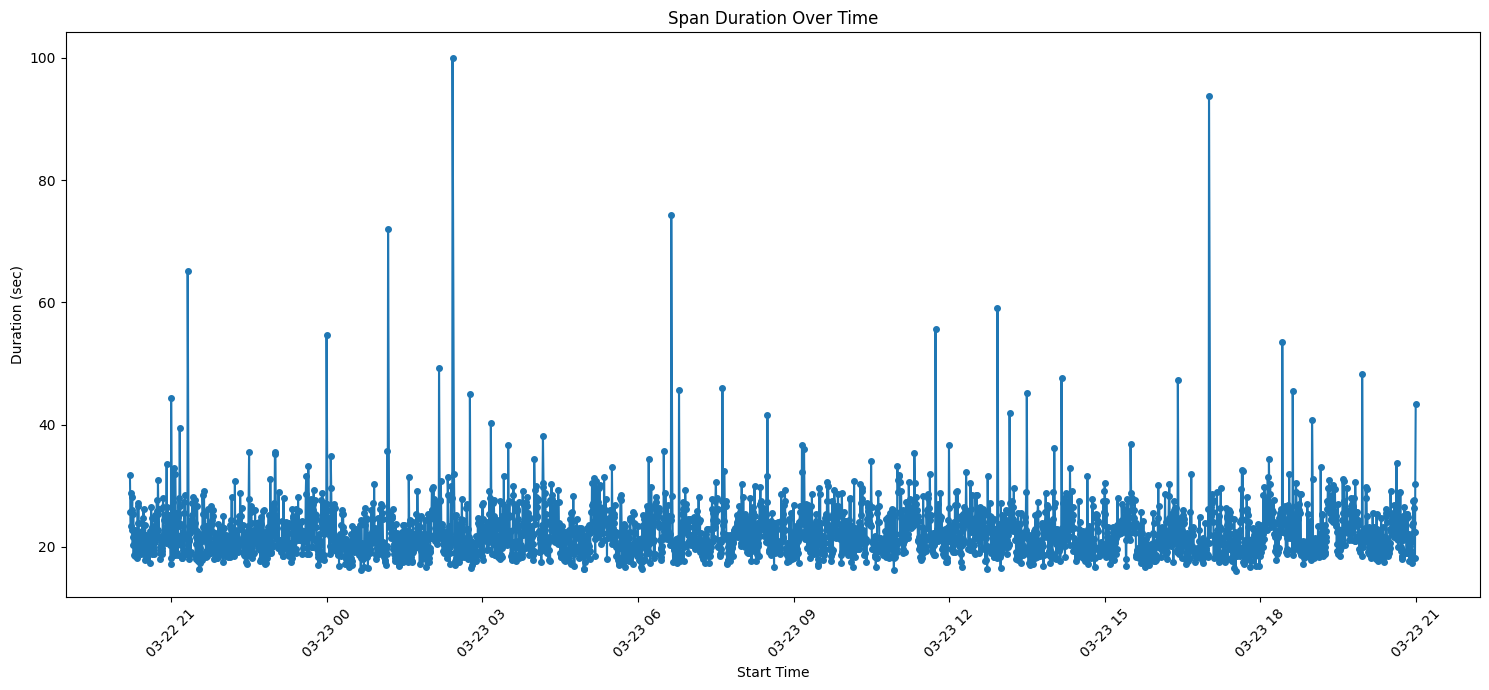

In [11]:
# We'll plot directly without setting the index this time, to avoid previous issues
plt.figure(figsize=(15, 7))
plt.plot_date(deduplicated_df_non_null_file_size['startTime'], deduplicated_df_non_null_file_size['duration'], '-', marker='o', markersize=4)

plt.title('Span Duration Over Time')
plt.xlabel('Start Time')
plt.ylabel('Duration (sec)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()

In [12]:
# Dropping columns with all NaN values
cleaned_df = deduplicated_df_non_null_file_size.dropna(axis=1, how='all')

# Display the first few rows to verify the changes
cleaned_df.head()


,spanID,traceID,operationName,tag_http.method,tag_http.scheme,tag_net.host.name,tag_net.sock.peer.addr,tag_net.sock.peer.port,tag_user_agent.original,tag_http.client_ip,...,tag_net.protocol.version,tag_http.route,tag_http.status_code,tag_span.kind,tag_internal.span.format,tag_otel.status_code,tag_error,startTime,duration,tag_minio.file.size
0,a2e4df5ffaaa14fe,71ce43e1dde3df564f3af7b04b2a5e24,/upload,POST,http,sr-api,172.21.0.1,39966.0,Python/3.12 aiohttp/3.9.3,188.120.248.124,...,1.1,/upload,200.0,server,otlp,None,None,2024-03-23 20:59:50.764822,43.379805,16622.0
8,8ef9a7ec0b2cc69b,00515190b8c7791e55ad9143b7522ec6,/upload,POST,http,sr-api,172.21.0.1,48300.0,Python/3.12 aiohttp/3.9.3,188.120.248.124,...,1.1,/upload,200.0,server,otlp,None,None,2024-03-23 20:59:19.733744,30.374452,9297.0
16,46dded639aa3f812,14509d2eea234da6154ee63bc2621828,/upload,POST,http,sr-api,172.21.0.1,60600.0,Python/3.12 aiohttp/3.9.3,188.120.248.124,...,1.1,/upload,200.0,server,otlp,None,None,2024-03-23 20:59:01.304120,18.254505,10446.0
24,06b7f1a64bfe9f10,8c7c538fe5b9d21d284552871c4db521,/upload,POST,http,sr-api,172.21.0.1,51192.0,Python/3.12 aiohttp/3.9.3,188.120.248.124,...,1.1,/upload,200.0,server,otlp,None,None,2024-03-23 20:58:38.682478,22.397795,14500.0
32,f904648bbba462c5,53f1442de6396ce3558fc1ab75494f62,/upload,POST,http,sr-api,172.21.0.1,54974.0,Python/3.12 aiohttp/3.9.3,188.120.248.124,...,1.1,/upload,200.0,server,otlp,None,None,2024-03-23 20:58:15.831379,22.453263,11229.0


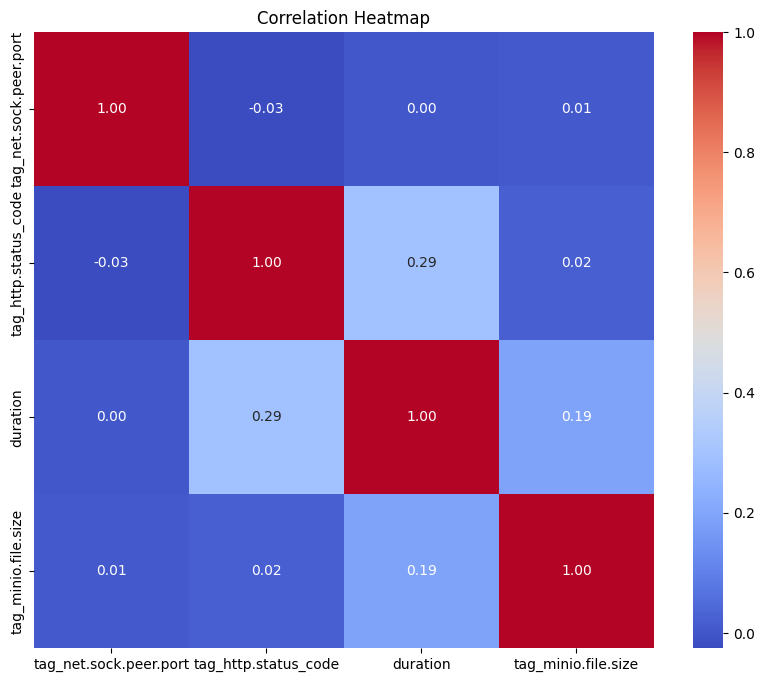

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Since the dataset is not suited for a heatmap directly (because it's not a matrix of values),
# let's create a correlation matrix from the numeric columns to visualize with a heatmap.
numeric_cols = deduplicated_df_non_null_file_size.select_dtypes(include=['number']).columns
corr = deduplicated_df_non_null_file_size[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [14]:
from scipy.stats import zscore

# Calculating the Z-score for the duration column
cleaned_df['z_score_duration'] = zscore(cleaned_df['duration'])

# Defining a threshold for what we consider an anomaly (commonly a Z-score above 3 or below -3)
threshold = 3

# Identifying anomalies in the duration time series based solely on the duration values
time_series_anomalies_duration_only = cleaned_df[(cleaned_df['z_score_duration'] > threshold) | (cleaned_df['z_score_duration'] < -threshold)]

# Displaying anomalies found based on Z-score, focusing only on duration and startTime
time_series_anomalies_duration_only[['startTime', 'duration', 'z_score_duration']]


/tmp/ipykernel_262483/2460728418.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['z_score_duration'] = zscore(cleaned_df['duration'])


,startTime,duration,z_score_duration
0,2024-03-23 20:59:50.764822,43.379805,4.966358
1336,2024-03-23 19:57:53.152358,48.347897,6.131326
2520,2024-03-23 18:59:55.002851,40.842854,4.371468
3008,2024-03-23 18:37:34.087735,45.556203,5.476701
3240,2024-03-23 18:25:29.212390,53.457075,7.329376
5048,2024-03-23 17:00:42.259133,93.753763,16.778545
5784,2024-03-23 16:24:39.875176,47.366444,5.901185
6872,2024-03-23 15:29:57.620577,36.794944,3.422274
8520,2024-03-23 14:10:03.538909,47.717756,5.983564
8704,2024-03-23 14:01:39.739774,36.204372,3.283791


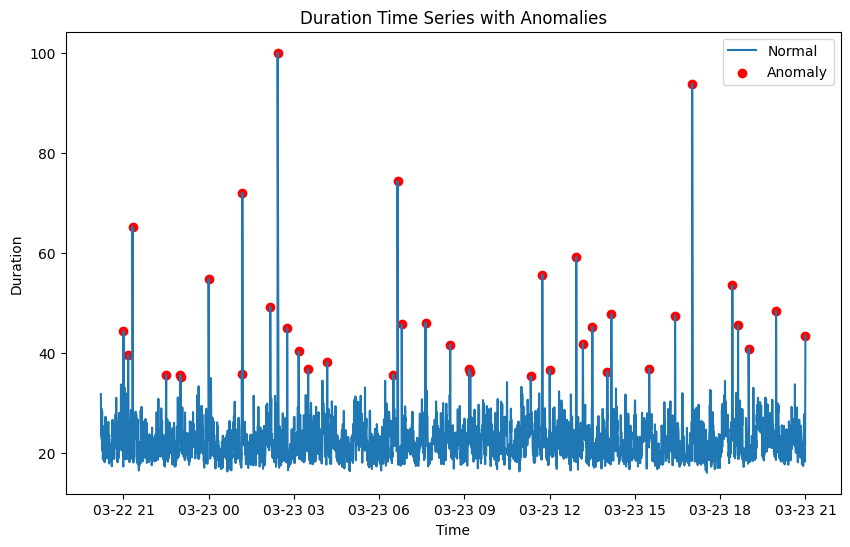

In [15]:
import matplotlib.pyplot as plt

# Assuming 'df' is your original DataFrame and 'anomalies' is the filtered DataFrame containing only anomalies
plt.figure(figsize=(10, 6))
plt.plot(cleaned_df['startTime'], cleaned_df['duration'], label='Normal')
plt.scatter(time_series_anomalies_duration_only['startTime'], time_series_anomalies_duration_only['duration'], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Duration')
plt.title('Duration Time Series with Anomalies')
plt.legend()
plt.show()


In [16]:
from sklearn.ensemble import IsolationForest

# Preparing the data for Isolation Forest
X = cleaned_df[['duration']]

# Initializing the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42, n_jobs=-1)

# Fitting the model
iso_forest.fit(X)

# Predicting anomalies (-1 for outliers, 1 for inliers)
cleaned_df['anomaly_iso_forest'] = iso_forest.predict(X)

# Identifying the anomalies
anomalies_iso_forest = cleaned_df[cleaned_df['anomaly_iso_forest'] == -1]

# Displaying some of the identified anomalies
anomalies_iso_forest[['startTime', 'duration', 'anomaly_iso_forest']].head()


/tmp/ipykernel_262483/267125896.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['anomaly_iso_forest'] = iso_forest.predict(X)


,startTime,duration,anomaly_iso_forest
0,2024-03-23 20:59:50.764822,43.379805,-1
8,2024-03-23 20:59:19.733744,30.374452,-1
48,2024-03-23 20:57:21.420076,27.718708,-1
56,2024-03-23 20:56:53.615900,27.537887,-1
96,2024-03-23 20:55:07.463401,17.358548,-1


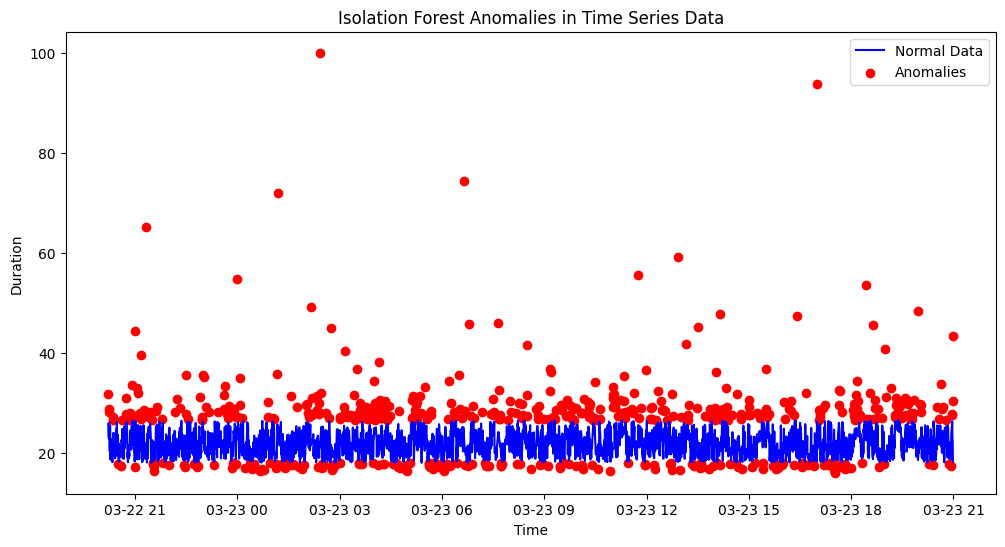

In [17]:
# Assuming 'cleaned_df' contains your original data with an 'anomaly_iso_forest' column indicating anomalies
normal_data = cleaned_df[cleaned_df['anomaly_iso_forest'] == 1]
anomalies = cleaned_df[cleaned_df['anomaly_iso_forest'] == -1]

plt.figure(figsize=(12, 6))

# Plot normal points
plt.plot(normal_data['startTime'], normal_data['duration'], 'b-', label='Normal Data')

# Highlight anomalies
plt.scatter(anomalies['startTime'], anomalies['duration'], color='red', label='Anomalies')

plt.xlabel('Time')
plt.ylabel('Duration')
plt.title('Isolation Forest Anomalies in Time Series Data')
plt.legend()

plt.show()


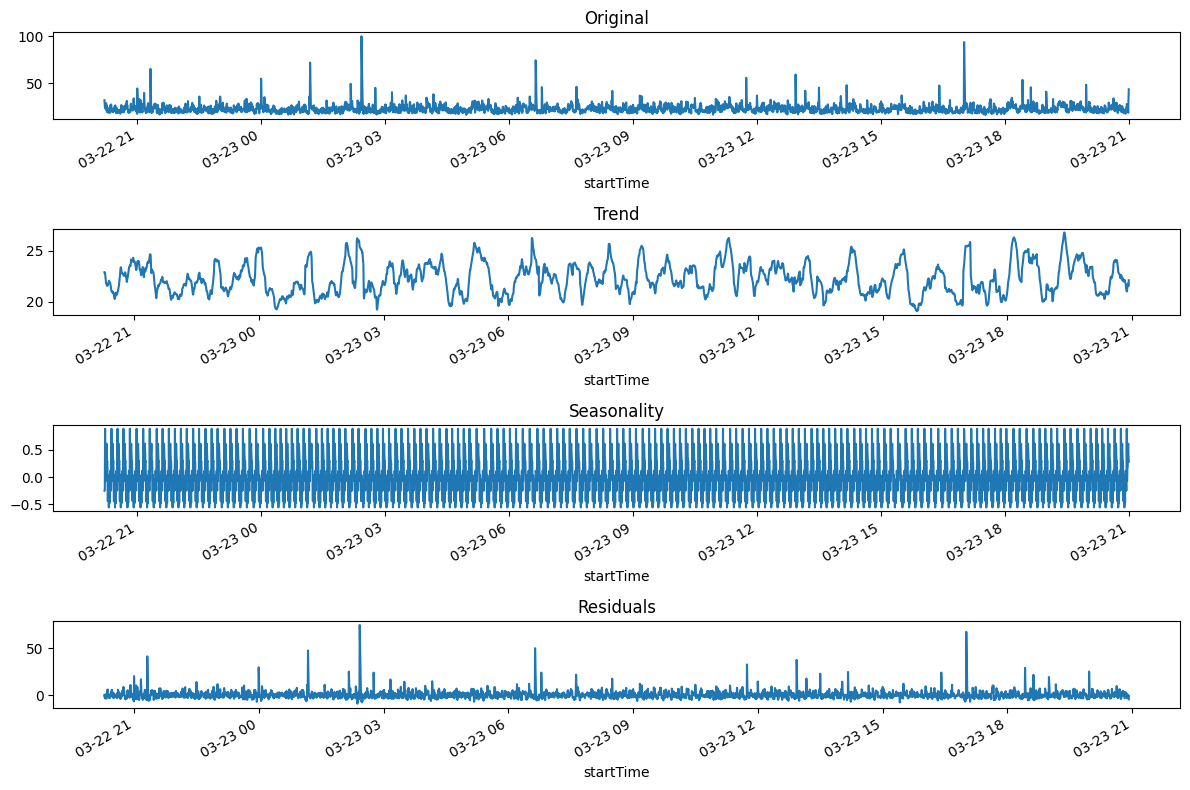

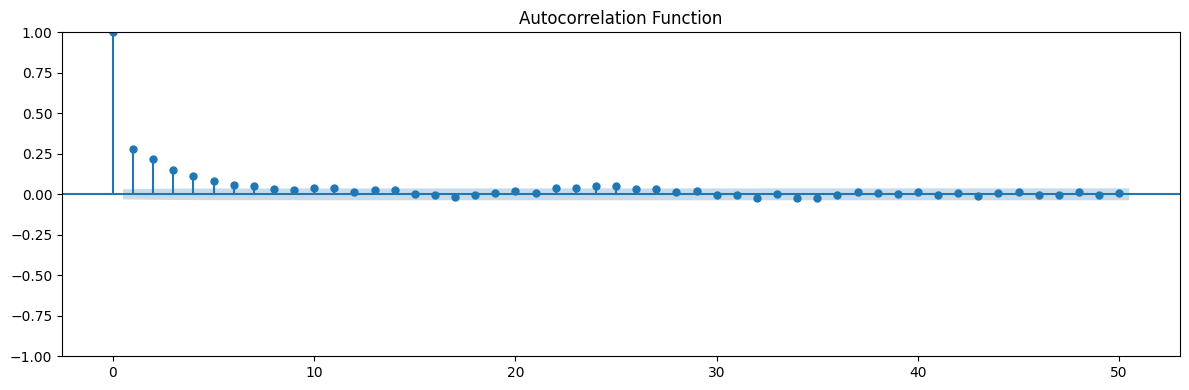

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

duration_series = cleaned_df.set_index('startTime')['duration']
# Seasonal Decomposition
# Note: The frequency of the seasonality should ideally be based on domain knowledge or exploration.
# Here, we assume a generic daily seasonality for demonstration, which might not match your specific dataset.
decomposition_result = seasonal_decompose(duration_series, model='additive', period=24)

# Plotting the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition_result.observed.plot(ax=ax1, title='Original')
decomposition_result.trend.plot(ax=ax2, title='Trend')
decomposition_result.seasonal.plot(ax=ax3, title='Seasonality')
decomposition_result.resid.plot(ax=ax4, title='Residuals')
plt.tight_layout()

# Plotting the Autocorrelation Function (ACF)
plt.figure(figsize=(12, 4))
plot_acf(duration_series, lags=50, ax=plt.gca())
plt.title('Autocorrelation Function')
plt.tight_layout()

plt.show()


/home/dzailz/urfu/anomalies_detection/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dzailz/urfu/anomalies_detection/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dzailz/urfu/anomalies_detection/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/dzailz/urfu/anomalies_detection/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, c

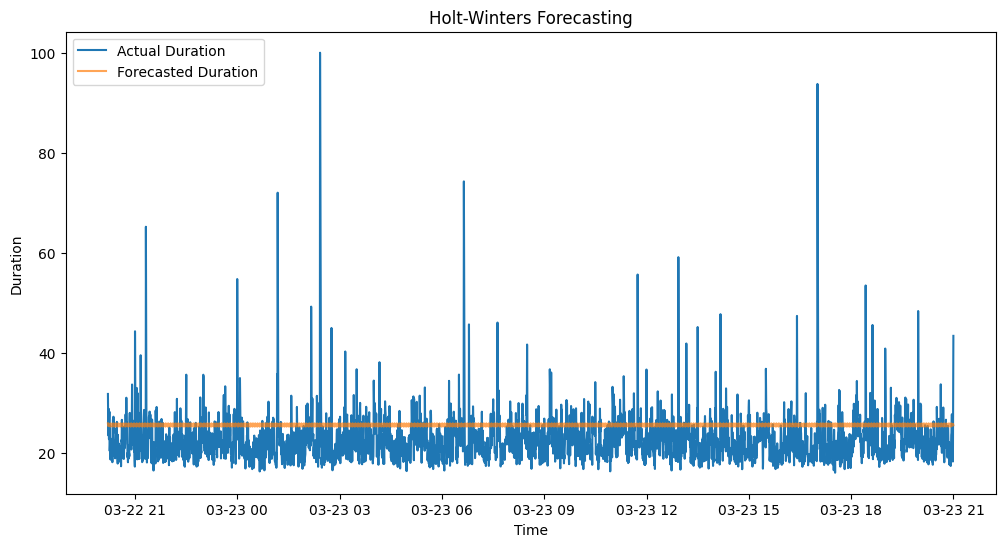

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming 'duration' is our target series
# Preparing the series
duration_series = cleaned_df.set_index('startTime')['duration']

# Fitting the Holt-Winters model (assuming an additive trend and additive seasonality for illustration)
# Note: The choice of seasonal_periods should be based on the dataset's characteristics
hw_model = ExponentialSmoothing(duration_series, trend="add", seasonal="add", seasonal_periods=12, damped_trend=True).fit()

# Forecasting the next points (same number as the dataset length for demonstration)
duration_forecast = hw_model.forecast(steps=len(duration_series))

# For anomaly detection, here we would compare actual values against these forecasts
# However, we'll plot the forecast against actual values for visualization
plt.figure(figsize=(12, 6))
plt.plot(duration_series.index, duration_series, label='Actual Duration')
plt.plot(duration_series.index, duration_forecast, label='Forecasted Duration', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Duration')
plt.title('Holt-Winters Forecasting')
plt.legend()
plt.show()
